In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for graphitz decision tree
from sklearn import tree

In [4]:
# to know all the available dataset
# sns.get_dataset_names()

In [5]:
#reading the data
#If you have it in your system
df = pd.read_csv('txt.csv', index_col = 0)
df.head()

,ItemslLengthCm,ItemsWidthCm,ItemsheightCm,ItemsweightCm,Items
Id,,,,,
1,2.5,3.5,1.2,1.70,Talisman Green-Items
2,2.5,0.2,0.4,0.15,Talisman White-Items
3,1.5,3.0,1.4,0.12,Talisman Pink-Items
4,1.7,3.2,1.3,0.23,Talisman Blue-Items
5,4.6,3.1,1.5,0.20,Talisman Yellow-Items


In [6]:
#If you have it in your system
#df = pd.read_csv('Items.csv', index_col = 0)
#df.head()

In [7]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ItemslLengthCm  12 non-null     float64
 1   ItemsWidthCm    12 non-null     float64
 2   ItemsheightCm   12 non-null     float64
 3   ItemsweightCm   12 non-null     float64
 4   Items           12 non-null     object 
dtypes: float64(4), object(1)
memory usage: 576.0+ bytes


In [8]:
df.isnull().any()

ItemslLengthCm    False
ItemsWidthCm      False
ItemsheightCm     False
ItemsweightCm     False
Items             False
dtype: bool

In [9]:
df.shape

(12, 5)

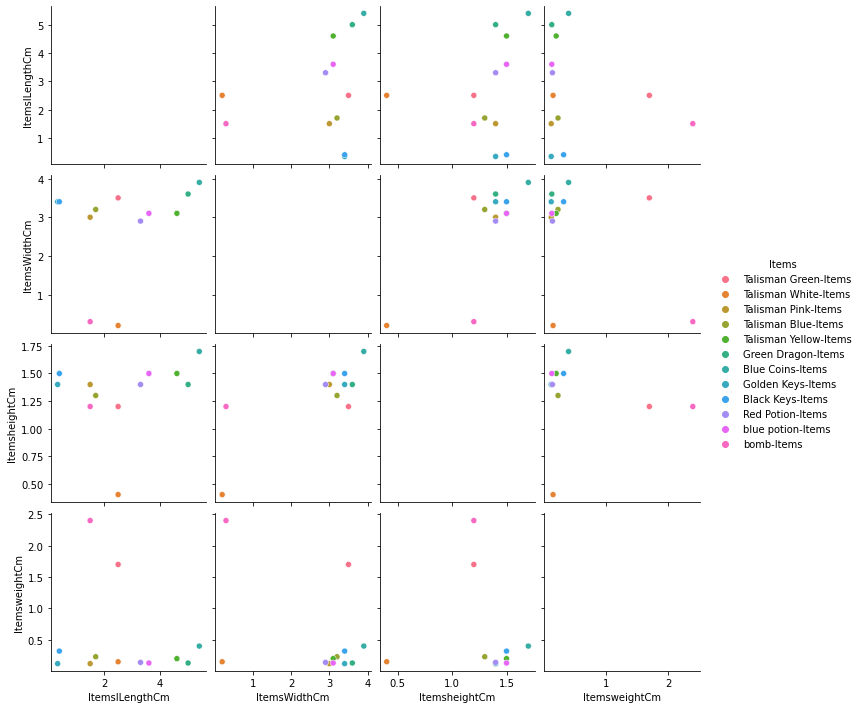

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Items')
plt.savefig("pne.png")

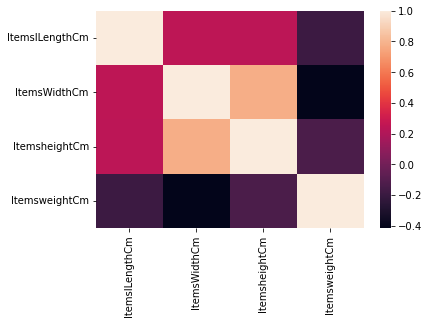

In [11]:
# correlation matrix
sns.heatmap(df.corr())
plt.savefig("one.png")

In [12]:
target = df['Items']
df1 = df.copy()
df1 = df1.drop('Items', axis =1)
df1.shape

(12, 4)

In [13]:
df1.head()


,ItemslLengthCm,ItemsWidthCm,ItemsheightCm,ItemsweightCm
Id,,,,
1,2.5,3.5,1.2,1.70
2,2.5,0.2,0.4,0.15
3,1.5,3.0,1.4,0.12
4,1.7,3.2,1.3,0.23
5,4.6,3.1,1.5,0.20


In [14]:
# Defining the attributes
X = df1

In [15]:
target

Id
1      Talisman Green-Items
2      Talisman White-Items
3       Talisman Pink-Items
4       Talisman Blue-Items
5     Talisman Yellow-Items
6        Green Dragon-Items
7          Blue Coins-Items
8         Golden Keys-Items
9          Black Keys-Items
10         Red Potion-Items
11        blue potion-Items
12               bomb-Items
Name: Items, dtype: object

In [16]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)

In [17]:
y = target

In [18]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)


Training split input-  (9, 4)
Testing split input-  (3, 4)


In [19]:
# Defining the decision tree algorithm

dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [20]:
#tree_reg =tree.DecisionTreeRegressor(random_state = 2)
#tree_reg.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/Users/eriimarie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eriimarie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eriimarie/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eriimari

In [21]:
cm

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

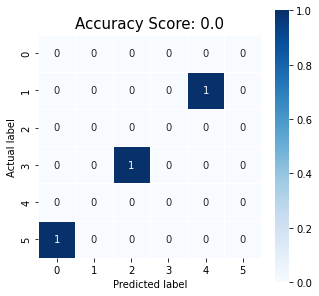

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

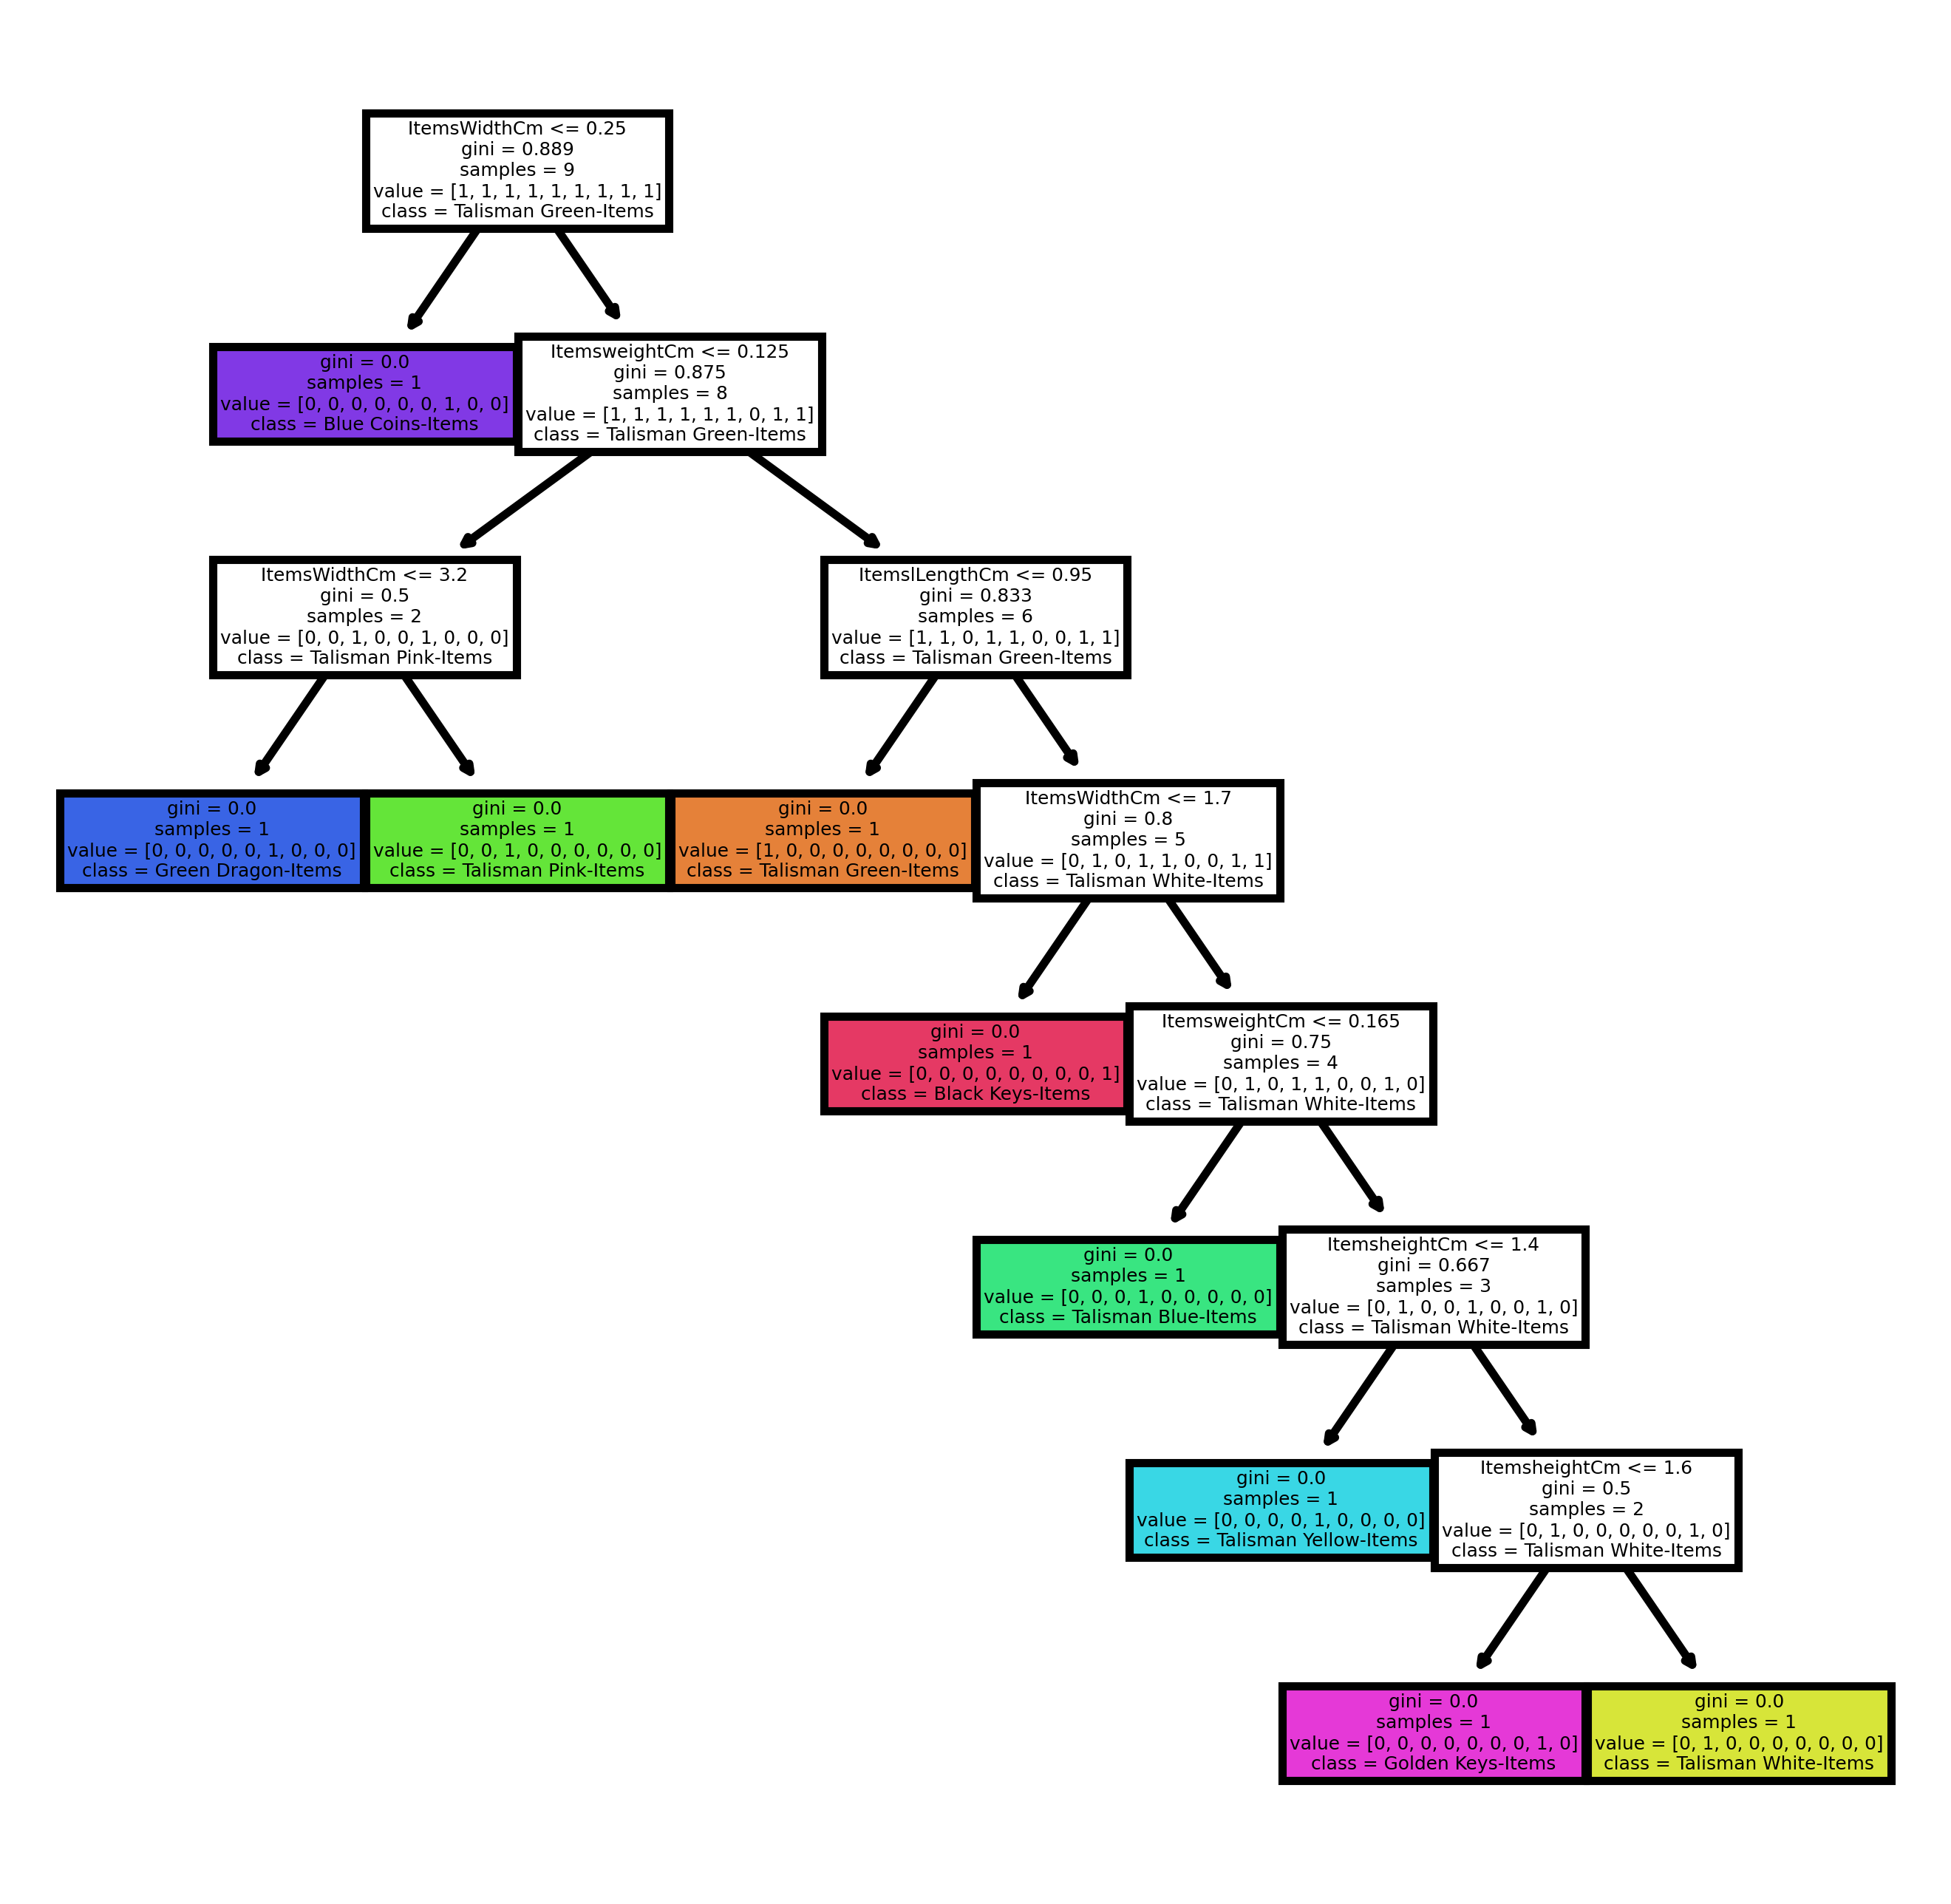

In [28]:
#Using plot tree for visualising tree 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(dtree,feature_names = X_train.columns, class_names=df['Items'].unique(), filled = True);
fig.savefig('tree.png')

In [29]:
# Using graphviz for decision tree
#from sklearn import tree
#import graphviz
#dot_data = tree.export_graphviz(dtree,out_file=None, filled=True)
#graph = graphviz.Source(dot_data, format="png")
#tree.export_graphviz(dtree,
                     #out_file="tree.dot",
                     #feature_names = X_train.columns, 
                     #class_names=df['Items'].unique(),
                     #filled = True)
#graph